In [1]:
import vectorbt as vbt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from numba import njit, f8, i8, b1, optional

## utils.py

In [3]:
from vectorbt.utils import *

In [4]:
check_not_none(0)

In [5]:
check_type(0, int)
check_type(0., float)
check_type(np.array(0.), np.ndarray)

In [6]:
check_dtype(np.empty((1, 1), dtype=np.uint8), np.uint8)

In [7]:
check_same_dtype(np.empty(1, dtype=np.float64), np.empty(1, dtype=np.float64))
check_same_dtype(pd.DataFrame({'a': [1., 2.], 'b': [1., 2.]}), np.empty(1, dtype=np.float64))
check_same_dtype(np.empty(1, dtype=np.float64), pd.DataFrame({'a': [1., 2.], 'b': [1., 2.]}))
check_same_dtype(pd.DataFrame({'a': [1, 2], 'b': [1., 2.]}), pd.DataFrame({'a': [1, 2], 'b': [1., 2.]}))

In [8]:
check_ndim(np.empty((3, 3)), 2)

In [9]:
check_same_shape(np.empty((3, 3)), np.empty((3, 3)))
check_same_shape(np.empty((3, 3)), np.empty((3, 6)), along_axis=0)
check_same_shape(np.empty((3, 3)), np.empty((6, 3)), along_axis=1)
check_same_shape(np.empty((3, 6)), np.empty((6, 3)), along_axis=(0, 1))

In [10]:
check_same_index(pd.Series([1, 2, 3], index=['a', 'b', 'c']), pd.Series([1, 2, 3], index=['a', 'b', 'c']))

In [11]:
check_same_columns(pd.DataFrame([[1, 2, 3]], columns=['a', 'b', 'c']), pd.DataFrame([[1, 2, 3]], columns=['a', 'b', 'c']))

In [12]:
check_same_meta(pd.DataFrame([[1, 2], [3, 4]]), pd.DataFrame([[1, 2], [3, 4]]))

In [13]:
check_same(pd.DataFrame([[1, 2], [3, 4]]), pd.DataFrame([[1, 2], [3, 4]]))

In [14]:
print(to_1d(None))
print(to_1d(0))
print(to_1d(np.array([1, 2])))
print(to_1d(pd.Series([1, 2])))
print(to_1d(pd.DataFrame([1, 2])))

[None]
[0]
[1 2]
0    1
1    2
dtype: int64
0    1
1    2
Name: 0, dtype: int64


In [15]:
print(to_2d(None))
print(to_2d(0))
print(to_2d(np.array([1, 2])))
print(to_2d(pd.Series([1, 2])))
print(to_2d(pd.DataFrame([1, 2])))

[[None]]
[[0]]
[[1]
 [2]]
   0
0  1
1  2
   0
0  1
1  2


In [16]:
print(broadcast_to(0, pd.Series([1, 2, 3])))
print(broadcast_to(
    pd.Series([1], index=['x']),
    pd.Series([1, 2, 3], index=['x', 'y', 'z'])
))
print(broadcast_to(
    pd.Series([1, 2, 3], index=['x', 'y', 'z']),
    pd.DataFrame([[1, 2, 3], [1, 2, 3], [1, 2, 3]], index=['x', 'y', 'z'], columns=['a', 'b', 'c'])
))
print(broadcast_to(
    pd.DataFrame([[1, 2, 3]], index=['x'], columns=['a', 'b', 'c']),
    pd.DataFrame([[1, 2, 3], [1, 2, 3], [1, 2, 3]], index=['x', 'y', 'z'], columns=['a', 'b', 'c'])
))
print(broadcast_to(
    pd.DataFrame([[1], [2], [3]], index=['x', 'y', 'z'], columns=['a']),
    pd.DataFrame([[1, 2, 3], [1, 2, 3], [1, 2, 3]], index=['x', 'y', 'z'], columns=['a', 'b', 'c'])
))

[0 0 0]
x_0    1
x_1    1
x_2    1
dtype: int64
   0  1  2
x  1  1  1
y  2  2  2
z  3  3  3
     a  b  c
x_0  1  2  3
x_1  1  2  3
x_2  1  2  3
   a_0  a_1  a_2
x    1    1    1
y    2    2    2
z    3    3    3


In [17]:
for i in broadcast(0, pd.Series([1], index=['x']), pd.Series([1, 2, 3], index=['x', 'y', 'z'])):
    print(i)

[0 0 0]
x_0    1
x_1    1
x_2    1
dtype: int64
x    1
y    2
z    3
dtype: int64


In [18]:
for i in broadcast(0, pd.Series([1], index=['x']), pd.Series([1, 2, 3], index=['x', 'y', 'z']), np.empty((3, 1))):
    print(i)

[[0]
 [0]
 [0]]
     0
x_0  1
x_1  1
x_2  1
   0
x  1
y  2
z  3
[[2.23282809e-314]
 [2.23282811e-314]
 [2.23282812e-314]]


In [19]:
for i in broadcast(
    pd.DataFrame([[1]], index=['x'], columns=['a']),
    pd.DataFrame([[1], [2], [3]], index=['x', 'y', 'z'], columns=['a']),
    pd.DataFrame([[1, 2, 3]], index=['x'], columns=['a', 'b', 'c']),
    pd.DataFrame([[1, 2, 3], [1, 2, 3], [1, 2, 3]], index=['x', 'y', 'z'], columns=['a', 'b', 'c']),
):
    print(i)

     a_0  a_1  a_2
x_0    1    1    1
x_1    1    1    1
x_2    1    1    1
   a_0  a_1  a_2
x    1    1    1
y    2    2    2
z    3    3    3
     a  b  c
x_0  1  2  3
x_1  1  2  3
x_2  1  2  3
   a  b  c
x  1  2  3
y  1  2  3
z  1  2  3


In [20]:
broadcast_to_array_of([-1, -2], pd.DataFrame([[0, 1], [2, 3]]))

array([[[-1, -1],
        [-1, -1]],

       [[-2, -2],
        [-2, -2]]])

In [21]:
def a_nb(self): return self ** 2

@add_safe_nb_methods(a_nb)
class H(pd.DataFrame):
    def h(self): return self

H([1, 2]).h()

,0
0,1
1,2


In [22]:
def indexing_func(obj, getitem_func): return H(getitem_func(obj.a))

@add_indexing_methods(indexing_func)
class H():
    def __init__(self, a):
        self.a = a
        
h = H(pd.Series([0.1, 0.2, 0.3]))
print(h.a)
print(h.iloc[0].a)

0    0.1
1    0.2
2    0.3
dtype: float64
0.1


In [23]:
class G():
    @cached_property
    def cache_me(self): return np.random.uniform(size=(10000, 10000))
    
g = G()

In [24]:
%time _ = g.cache_me

CPU times: user 1.22 s, sys: 220 ms, total: 1.45 s
Wall time: 1.48 s


In [25]:
%time _ = g.cache_me

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 9.06 µs


In [26]:
print(pd.Series([1, 2, 3], index=['a', 'b', 'c']).arr.to_1d_array())
print(pd.Series([1, 2, 3], index=['a', 'b', 'c']).arr.to_2d_array())
print(pd.Series([1, 2, 3], index=['a', 'b', 'c']).arr.wrap_array(np.array([[4, 5], [6, 7], [8, 9]])))

[1 2 3]
[[1]
 [2]
 [3]]
   0  1
a  4  5
b  6  7
c  8  9


In [27]:
i1 = pd.DataFrame.cols.index_from_params([0.1, 0.2], name='a')
i2 = pd.DataFrame.cols.index_from_params(np.tile(np.arange(3)[:, None][:, None], (1, 3, 3)), name='b')
i3 = pd.DataFrame.cols.index_from_params(np.random.uniform(size=(3, 3, 3)), name='c')

print(i1)
print(i2)
print(i3)

Float64Index([0.1, 0.2], dtype='float64', name='a')
Int64Index([0, 1, 2], dtype='int64', name='b')
Index(['mix_0', 'mix_1', 'mix_2'], dtype='object', name='c')


In [28]:
i23 = pd.DataFrame.cols.stack_indexes(i2, i3)

print(i23)

MultiIndex([(0, 'mix_0'),
            (1, 'mix_1'),
            (2, 'mix_2')],
           names=['b', 'c'])


In [29]:
print(pd.DataFrame.cols.combine_indexes(i1, i2))
print(pd.DataFrame.cols.combine_indexes(i2, i3))
print(pd.DataFrame.cols.combine_indexes(i23, i23))

MultiIndex([(0.1, 0),
            (0.1, 1),
            (0.1, 2),
            (0.2, 0),
            (0.2, 1),
            (0.2, 2)],
           names=['a', 'b'])
MultiIndex([(0, 'mix_0'),
            (0, 'mix_1'),
            (0, 'mix_2'),
            (1, 'mix_0'),
            (1, 'mix_1'),
            (1, 'mix_2'),
            (2, 'mix_0'),
            (2, 'mix_1'),
            (2, 'mix_2')],
           names=['b', 'c'])
MultiIndex([(0, 'mix_0', 0, 'mix_0'),
            (0, 'mix_0', 1, 'mix_1'),
            (0, 'mix_0', 2, 'mix_2'),
            (1, 'mix_1', 0, 'mix_0'),
            (1, 'mix_1', 1, 'mix_1'),
            (1, 'mix_1', 2, 'mix_2'),
            (2, 'mix_2', 0, 'mix_0'),
            (2, 'mix_2', 1, 'mix_1'),
            (2, 'mix_2', 2, 'mix_2')],
           names=['b', 'c', 'b', 'c'])


In [30]:
print(pd.Series([1, 2, 3], index=pd.MultiIndex.from_tuples([(1, 1, 1), (1, 1, 2), (1, 2, 3)])).cols.unstack_to_array())
print(pd.Series([0.1, 0.2], index=pd.MultiIndex.from_tuples([(1, 1), (1, 3)])).cols.unstack_to_df())
print(pd.Series([0.1, 0.2], index=pd.MultiIndex.from_tuples([(1, 1), (1, 3)])).cols.unstack_to_df(symmetric=True))

[[[ 1.  2. nan]
  [nan nan  3.]]]
     1    3
1  0.1  0.2
     1    3
1  0.1  0.2
3  0.2  NaN


## ohlcv.py

In [31]:
ohlcv = pd.DataFrame({
    'Open': np.asarray([2., 3., 4., 5., 6.]),
    'High': np.asarray([7., 6., 5., 6., 7.]),
    'Low': np.asarray([1., 2., 3., 2., 1.]),
    'Close': np.asarray([6., 5., 4., 3., 2.])
})

In [32]:
ohlcv.ohlcv.plot()

FigureWidget({
    'data': [{'close': array([6., 5., 4., 3., 2.]),
              'high': array([7., 6., 5., 6.…

## timeseries.py

In [33]:
ts = pd.DataFrame({
    'a': [1, 2, 3, 4, np.nan], 
    'b': [np.nan, 4, 3, 2, 1],
    'c': [1, 2, 3, 2, 1]}, index=pd.Index([
    datetime(2018, 1, 1),
    datetime(2018, 1, 2),
    datetime(2018, 1, 3),
    datetime(2018, 1, 4),
    datetime(2018, 1, 5)
])).astype(np.float64)
ts

,a,b,c
2018-01-01,1.0,NaN,1.0
2018-01-02,2.0,4.0,2.0
2018-01-03,3.0,3.0,3.0
2018-01-04,4.0,2.0,2.0
2018-01-05,NaN,1.0,1.0


In [34]:
ts.timeseries.fillna(-1)

,a,b,c
2018-01-01,1.0,-1.0,1.0
2018-01-02,2.0,4.0,2.0
2018-01-03,3.0,3.0,3.0
2018-01-04,4.0,2.0,2.0
2018-01-05,-1.0,1.0,1.0


In [35]:
ts.timeseries.fshift(3)

,a,b,c
2018-01-01,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN
2018-01-04,1.0,NaN,1.0
2018-01-05,2.0,4.0,2.0


In [36]:
ts.timeseries.diff()

,a,b,c
2018-01-01,NaN,NaN,NaN
2018-01-02,1.0,NaN,1.0
2018-01-03,1.0,-1.0,1.0
2018-01-04,1.0,-1.0,-1.0
2018-01-05,NaN,-1.0,-1.0


In [37]:
ts.timeseries.pct_change()

,a,b,c
2018-01-01,NaN,NaN,NaN
2018-01-02,1.000000,NaN,1.000000
2018-01-03,0.500000,-0.250000,0.500000
2018-01-04,0.333333,-0.333333,-0.333333
2018-01-05,NaN,-0.500000,-0.500000


In [38]:
ts.timeseries.ffill()

,a,b,c
2018-01-01,1.0,NaN,1.0
2018-01-02,2.0,4.0,2.0
2018-01-03,3.0,3.0,3.0
2018-01-04,4.0,2.0,2.0
2018-01-05,4.0,1.0,1.0


In [39]:
ts.timeseries.cumsum()

,a,b,c
2018-01-01,1.0,NaN,1.0
2018-01-02,3.0,4.0,3.0
2018-01-03,6.0,7.0,6.0
2018-01-04,10.0,9.0,8.0
2018-01-05,NaN,10.0,9.0


In [40]:
ts.timeseries.cumprod()

,a,b,c
2018-01-01,1.0,NaN,1.0
2018-01-02,2.0,4.0,2.0
2018-01-03,6.0,12.0,6.0
2018-01-04,24.0,24.0,12.0
2018-01-05,NaN,24.0,12.0


In [41]:
ts.timeseries.rolling_mean(3)

,a,b,c
2018-01-01,1.0,NaN,1.000000
2018-01-02,1.5,4.0,1.500000
2018-01-03,2.0,3.5,2.000000
2018-01-04,3.0,3.0,2.333333
2018-01-05,3.5,2.0,2.000000


In [42]:
ts.timeseries.rolling_std(3)

,a,b,c
2018-01-01,0.000000,NaN,0.000000
2018-01-02,0.500000,0.000000,0.500000
2018-01-03,0.816497,0.500000,0.816497
2018-01-04,0.816497,0.816497,0.471405
2018-01-05,0.500000,0.816497,0.816497


In [43]:
ts.timeseries.expanding_max()

,a,b,c
2018-01-01,1.0,NaN,1.0
2018-01-02,2.0,4.0,2.0
2018-01-03,3.0,4.0,3.0
2018-01-04,4.0,4.0,3.0
2018-01-05,4.0,4.0,3.0


In [44]:
ts.timeseries.ewm_mean(2)

,a,b,c
2018-01-01,1.000000,NaN,1.000000
2018-01-02,1.750000,4.000000,1.750000
2018-01-03,2.615385,3.250000,2.615385
2018-01-04,3.550000,2.384615,2.200000
2018-01-05,3.550000,1.450000,1.396694


In [45]:
ts.timeseries.ewm_std(2)

,a,b,c
2018-01-01,NaN,NaN,NaN
2018-01-02,0.707107,NaN,0.707107
2018-01-03,0.919866,0.707107,0.919866
2018-01-04,1.059753,0.919866,0.656330
2018-01-05,1.059753,1.059753,0.884672


In [46]:
ts['a'].timeseries.rolling_window(2, step=2)

,0,2
0,1.0,3.0
1,2.0,4.0


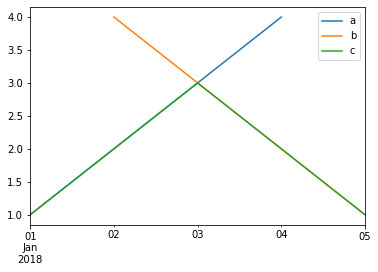

In [47]:
# Two ways of plotting
ts.plot()

In [48]:
ts.timeseries.plot()

FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'a',
              'type': 'scatter',
    …

In [49]:
ts['a'].timeseries.plot()

FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'a',
              'type': 'scatter',
    …

## signals.py

In [50]:
pd.DataFrame.signals.generate_empty((5, 3))

,0,1,2
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [51]:
entries = pd.DataFrame.signals.generate_random_entries((5, 3), 2, every_nth=2, seed=42, columns=['a', 'b', 'c'])

entries

,a,b,c
0,True,True,True
1,False,False,False
2,False,True,False
3,False,False,False
4,True,False,True


In [52]:
a = np.random.randint(-1, 2, size=(5, 3))
a

array([[-1,  1,  0],
       [-1, -1,  1],
       [ 0,  0,  0],
       [-1,  1,  1],
       [ 0,  1,  0]])

In [53]:
@njit
def entry_func_nb(exits, col_idx, prev_idx, next_idx, a):
    # First value after last entry
    entries = np.full(exits.shape, False, dtype=b1)
    entries[a[:, col_idx] > 0] = True
    return entries

@njit
def exit_func_nb(entries, col_idx, prev_idx, next_idx, a):
    # First value after last exit
    exits = np.full(entries.shape, False, dtype=b1)
    exits[a[:, col_idx] < 0] = True
    return exits

pd.DataFrame.signals.generate_entries_and_exits(a.shape, entry_func_nb, exit_func_nb, a)

(       0      1      2
 0  False   True  False
 1  False  False   True
 2  False  False  False
 3  False   True  False
 4  False  False  False,        0      1      2
 0  False  False  False
 1  False   True  False
 2  False  False  False
 3  False  False  False
 4  False  False  False)

In [54]:
entries.signals.generate_random_exits(seed=42)

,a,b,c
0,False,False,False
1,False,True,True
2,False,False,False
3,True,False,False
4,False,True,False


In [55]:
from numba import njit, b1

@njit
def exit_func_nb(entries, col_idx, prev_idx, next_idx):
    # First value after entry
    exit_mask = np.full(entries.shape, False, dtype=b1)
    exit_mask[prev_idx+1:next_idx] = True
    return exit_mask

entries.signals.generate_exits(exit_func_nb)

,a,b,c
0,False,False,False
1,True,True,True
2,False,False,False
3,False,True,False
4,False,False,False


In [56]:
entries.signals.generate_exits(exit_func_nb, only_first=False)

,a,b,c
0,False,False,False
1,True,True,True
2,True,False,True
3,True,True,True
4,False,True,False


In [57]:
entries.signals.generate_stoploss_exits(ts, 0.1)

,a,b,c
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [58]:
entries.signals.generate_stoploss_exits(ts, 0.1)

,a,b,c
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [59]:
entries.signals.generate_stoploss_exits(ts, [0.1, 0.5])

stoploss    0.1                  0.5              
              a      b      c      a      b      c
0         False  False  False  False  False  False
1         False  False  False  False  False  False
2         False  False  False  False  False  False
3         False   True  False  False  False  False
4         False  False  False  False   True  False

In [60]:
stops = np.asarray([np.full(ts.shape, 0.1), np.full(ts.shape, 0.5)])
stops

array([[[0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1]],

       [[0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]]])

In [61]:
entries.signals.generate_stoploss_exits(ts, stops)

stoploss    0.1                  0.5              
              a      b      c      a      b      c
0         False  False  False  False  False  False
1         False  False  False  False  False  False
2         False  False  False  False  False  False
3         False   True  False  False  False  False
4         False  False  False  False   True  False

In [62]:
entries.signals.generate_stoploss_exits(ts, np.random.uniform(size=(2, 5, 3)))

stoploss  mix_0                mix_1              
              a      b      c      a      b      c
0         False  False  False  False  False  False
1         False  False  False  False  False  False
2         False  False  False  False  False  False
3         False   True  False  False   True  False
4         False  False  False  False  False  False

In [63]:
entries.signals.generate_trailstop_exits(ts, 0.1)

,a,b,c
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,True
4,False,False,False


In [64]:
entries.signals.generate_trailstop_exits(ts, [0.1, 0.5])

trailstop    0.1                  0.5              
               a      b      c      a      b      c
0          False  False  False  False  False  False
1          False  False  False  False  False  False
2          False  False  False  False  False  False
3          False   True   True  False  False  False
4          False  False  False  False   True  False

In [65]:
entries.signals.generate_trailstop_exits(ts, stops)

trailstop    0.1                  0.5              
               a      b      c      a      b      c
0          False  False  False  False  False  False
1          False  False  False  False  False  False
2          False  False  False  False  False  False
3          False   True   True  False  False  False
4          False  False  False  False   True  False

In [66]:
entries.signals.n

a    2
b    2
c    2
dtype: int64

In [67]:
entries.signals.avg_distance

a    4.0
b    2.0
c    4.0
dtype: float64

In [68]:
entries.signals.shuffle(seed=42)

,a,b,c
0,False,False,False
1,True,False,True
2,False,True,False
3,True,True,True
4,False,False,False


In [69]:
entries.signals.fshift(2)

,a,b,c
0,False,False,False
1,False,False,False
2,True,True,True
3,False,False,False
4,False,True,False


In [70]:
entries.signals.rank_true()

,a,b,c
0,1,1,1
1,0,0,0
2,0,1,0
3,0,0,0
4,1,0,1


In [71]:
entries.signals.rank_false()

,a,b,c
0,0,0,0
1,1,1,1
2,2,0,2
3,3,1,3
4,0,2,0


In [72]:
entries.signals.first_true()

,a,b,c
0,True,True,True
1,False,False,False
2,False,True,False
3,False,False,False
4,True,False,True


In [73]:
entries.signals.first_true(after_false=True)

,a,b,c
0,False,False,False
1,False,False,False
2,False,True,False
3,False,False,False
4,True,False,True


In [74]:
entries.signals.first_false()

,a,b,c
0,False,False,False
1,True,True,True
2,False,False,False
3,False,True,False
4,False,False,False


In [75]:
entries.signals.first_false(after_true=True)

,a,b,c
0,False,False,False
1,True,True,True
2,False,False,False
3,False,True,False
4,False,False,False


In [76]:
entries.signals.nst_true(2)

,a,b,c
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [77]:
entries.signals.nst_false(2)

,a,b,c
0,False,False,False
1,False,False,False
2,True,False,True
3,False,False,False
4,False,True,False


In [78]:
entries.signals.from_nst_true(2)

,a,b,c
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [79]:
entries.signals.from_nst_false(2)

,a,b,c
0,False,False,False
1,False,False,False
2,True,False,True
3,True,False,True
4,False,True,False


In [80]:
entries.signals.plot()

FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'a',
              'type': 'scatter',
    …

In [81]:
entries['a'].signals.plot()

FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'a',
              'type': 'scatter',
    …

## strategy.py

In [82]:
dmac = vbt.DMAC(ts, 2, 3)

dmac.fast, dmac.slow

(              a    b    c
 2018-01-01  NaN  NaN  NaN
 2018-01-02  NaN  NaN  NaN
 2018-01-03  2.5  3.5  2.5
 2018-01-04  3.5  2.5  2.5
 2018-01-05  4.0  1.5  1.5,               a    b         c
 2018-01-01  NaN  NaN       NaN
 2018-01-02  NaN  NaN       NaN
 2018-01-03  NaN  NaN       NaN
 2018-01-04  3.0  3.0  2.333333
 2018-01-05  3.5  2.0  2.000000)

In [83]:
dmac.is_fast_above_slow(), dmac.is_fast_below_slow()

(                a      b      c
 2018-01-01  False  False  False
 2018-01-02  False  False  False
 2018-01-03  False  False  False
 2018-01-04   True  False   True
 2018-01-05   True  False  False,                 a      b      c
 2018-01-01  False  False  False
 2018-01-02  False  False  False
 2018-01-03  False  False  False
 2018-01-04  False   True  False
 2018-01-05  False   True   True)

In [84]:
dmac.crossover_signals()

(                a      b      c
 2018-01-01  False  False  False
 2018-01-02  False  False  False
 2018-01-03  False  False  False
 2018-01-04   True  False   True
 2018-01-05  False  False  False,                 a      b      c
 2018-01-01  False  False  False
 2018-01-02  False  False  False
 2018-01-03  False  False  False
 2018-01-04  False   True  False
 2018-01-05  False  False   True)

In [85]:
dmac['a'].plot()

FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'Price',
              'type': 'scatter',
…

In [86]:
vbt.DMAC(ts, [2, 3], 4).fast

fast_window    2              3               
slow_window    4              4               
               a    b    c    a    b         c
2018-01-01   NaN  NaN  NaN  NaN  NaN       NaN
2018-01-02   NaN  NaN  NaN  NaN  NaN       NaN
2018-01-03   2.5  3.5  2.5  NaN  NaN       NaN
2018-01-04   3.5  2.5  2.5  3.0  3.0  2.333333
2018-01-05   4.0  1.5  1.5  3.5  2.0  2.000000

In [87]:
vbt.DMAC(ts, 2, [3, 4]).fast

fast_window    2                         
slow_window    3              4          
               a    b    c    a    b    c
2018-01-01   NaN  NaN  NaN  NaN  NaN  NaN
2018-01-02   NaN  NaN  NaN  NaN  NaN  NaN
2018-01-03   2.5  3.5  2.5  2.5  3.5  2.5
2018-01-04   3.5  2.5  2.5  3.5  2.5  2.5
2018-01-05   4.0  1.5  1.5  4.0  1.5  1.5

In [88]:
vbt.DMAC(ts, [2, 3], [4, 5]).fast

fast_window    2              3               
slow_window    4              5               
               a    b    c    a    b         c
2018-01-01   NaN  NaN  NaN  NaN  NaN       NaN
2018-01-02   NaN  NaN  NaN  NaN  NaN       NaN
2018-01-03   2.5  3.5  2.5  NaN  NaN       NaN
2018-01-04   3.5  2.5  2.5  3.0  3.0  2.333333
2018-01-05   4.0  1.5  1.5  3.5  2.0  2.000000

In [89]:
bb = vbt.BollingerBands(ts, 2, 1)

bb.upper, bb.middle, bb.lower

(              a    b    c
 2018-01-01  NaN  NaN  NaN
 2018-01-02  NaN  NaN  NaN
 2018-01-03  3.0  4.0  3.0
 2018-01-04  4.0  3.0  3.0
 2018-01-05  4.0  2.0  2.0,               a    b    c
 2018-01-01  NaN  NaN  NaN
 2018-01-02  NaN  NaN  NaN
 2018-01-03  2.5  3.5  2.5
 2018-01-04  3.5  2.5  2.5
 2018-01-05  4.0  1.5  1.5,               a    b    c
 2018-01-01  NaN  NaN  NaN
 2018-01-02  NaN  NaN  NaN
 2018-01-03  2.0  3.0  2.0
 2018-01-04  3.0  2.0  2.0
 2018-01-05  4.0  1.0  1.0)

In [90]:
vbt.BollingerBands(ts, 2, 1).upper

,a,b,c
2018-01-01,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN
2018-01-03,3.0,4.0,3.0
2018-01-04,4.0,3.0,3.0
2018-01-05,4.0,2.0,2.0


In [91]:
vbt.BollingerBands(ts, [2, 3], 1).upper

window        2                   3                    
std_n         1                   1                    
              a    b    c         a         b         c
2018-01-01  NaN  NaN  NaN       NaN       NaN       NaN
2018-01-02  NaN  NaN  NaN       NaN       NaN       NaN
2018-01-03  3.0  4.0  3.0       NaN       NaN       NaN
2018-01-04  4.0  3.0  3.0  3.816497  3.816497  2.804738
2018-01-05  4.0  2.0  2.0  4.000000  2.816497  2.816497

In [92]:
vbt.BollingerBands(ts, 2, [1, 2]).upper

window        2                         
std_n         1              2          
              a    b    c    a    b    c
2018-01-01  NaN  NaN  NaN  NaN  NaN  NaN
2018-01-02  NaN  NaN  NaN  NaN  NaN  NaN
2018-01-03  3.0  4.0  3.0  3.5  4.5  3.5
2018-01-04  4.0  3.0  3.0  4.5  3.5  3.5
2018-01-05  4.0  2.0  2.0  4.0  2.5  2.5

In [93]:
vbt.BollingerBands(ts, [2, 3], [1, 2]).upper

window        2                   3                    
std_n         1                   2                    
              a    b    c         a         b         c
2018-01-01  NaN  NaN  NaN       NaN       NaN       NaN
2018-01-02  NaN  NaN  NaN       NaN       NaN       NaN
2018-01-03  3.0  4.0  3.0       NaN       NaN       NaN
2018-01-04  4.0  3.0  3.0  4.632993  4.632993  3.276142
2018-01-05  4.0  2.0  2.0  4.500000  3.632993  3.632993

In [94]:
bb.percent_b, bb.bandwidth

(              a    b    c
 2018-01-01  NaN  NaN  NaN
 2018-01-02  NaN  NaN  NaN
 2018-01-03  1.0  0.0  1.0
 2018-01-04  1.0  0.0  0.0
 2018-01-05  NaN  0.0  0.0,                    a         b         c
 2018-01-01       NaN       NaN       NaN
 2018-01-02       NaN       NaN       NaN
 2018-01-03  0.400000  0.285714  0.400000
 2018-01-04  0.285714  0.400000  0.400000
 2018-01-05  0.000000  0.666667  0.666667)

In [95]:
bb.is_percent_b_above(0.5)

,a,b,c
2018-01-01,False,False,False
2018-01-02,False,False,False
2018-01-03,True,False,True
2018-01-04,True,False,False
2018-01-05,False,False,False


In [96]:
bb = vbt.BollingerBands(ts, [2, 3], 1)

In [97]:
bb[(2, 1, 'a')].plot()

FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'Price',
              'type': 'scatter',
…

In [98]:
bb.is_percent_b_above([[0.1], [0.5]])

threshold     0.1                                       0.5                \
window          2                    3                    2                 
std_n           1                    1                    1                 
                a      b      c      a      b      c      a      b      c   
2018-01-01  False  False  False  False  False  False  False  False  False   
2018-01-02  False  False  False  False  False  False  False  False  False   
2018-01-03   True  False   True  False  False  False   True  False   True   
2018-01-04   True  False  False   True  False   True   True  False  False   
2018-01-05  False  False  False  False  False  False  False  False  False   

threshold                        
window          3                
std_n           1                
                a      b      c  
2018-01-01  False  False  False  
2018-01-02  False  False  False  
2018-01-03  False  False  False  
2018-01-04   True  False  False  
2018-01-05  False  False  False

In [99]:
bb[(2, 1, 'a')].is_percent_b_above([[0.1], [0.5]])

threshold,0.1,0.5
2018-01-01,False,False
2018-01-02,False,False
2018-01-03,True,True
2018-01-04,True,True
2018-01-05,False,False


In [100]:
bb.is_percent_b_above([[0.1], [0.5]])[(0.1, 2, 1, 'a')].signals.plot()

FigureWidget({
    'data': [{'mode': 'lines',
              'name': "(0.1, 2, 1, 'a')",
              'type': …

In [101]:
rsi = vbt.RSI(ts, [2, 3])

rsi.rsi

window          2                  3                
                a    b      c      a    b          c
2018-01-01    NaN  NaN    NaN    NaN  NaN        NaN
2018-01-02    NaN  NaN    NaN    NaN  NaN        NaN
2018-01-03  100.0  0.0  100.0    NaN  NaN        NaN
2018-01-04  100.0  0.0   50.0  100.0  0.0  66.666667
2018-01-05  100.0  0.0    0.0  100.0  0.0  33.333333

In [102]:
rsi[(2, 'c')].plot()

FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'RSI',
              'type': 'scatter',
  …

In [103]:
rsi.is_rsi_above([70, 100])

threshold   70.0                                      100.0                \
window          2                    3                    2                 
                a      b      c      a      b      c      a      b      c   
2018-01-01  False  False  False  False  False  False  False  False  False   
2018-01-02  False  False  False  False  False  False  False  False  False   
2018-01-03   True  False   True  False  False  False  False  False  False   
2018-01-04   True  False  False   True  False  False  False  False  False   
2018-01-05   True  False  False   True  False  False  False  False  False   

threshold                        
window          3                
                a      b      c  
2018-01-01  False  False  False  
2018-01-02  False  False  False  
2018-01-03  False  False  False  
2018-01-04  False  False  False  
2018-01-05  False  False  False

In [104]:
rsi.is_rsi_above([70, 100])[70, 2, 'a']

2018-01-01    False
2018-01-02    False
2018-01-03     True
2018-01-04     True
2018-01-05     True
Name: (70.0, 2, a), dtype: bool

## portfolio.py

In [105]:
ts = pd.DataFrame({
    'a': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'b': [9, 8, 7, 6, 5, 4, 3, 2, 1],
    'c': [1, 2, 3, 4, 5, 4, 3, 2, 1],
    'd': [5, 4, 3, 2, 1, 2, 3, 4, 5]
}).astype(float)
ts

,a,b,c,d
0,1.0,9.0,1.0,5.0
1,2.0,8.0,2.0,4.0
2,3.0,7.0,3.0,3.0
3,4.0,6.0,4.0,2.0
4,5.0,5.0,5.0,1.0
5,6.0,4.0,4.0,2.0
6,7.0,3.0,3.0,3.0
7,8.0,2.0,2.0,4.0
8,9.0,1.0,1.0,5.0


In [106]:
from datetime import datetime

index = pd.Index([
    datetime(2020, 1, 1),
    datetime(2020, 1, 2),
    datetime(2020, 1, 3),
    datetime(2020, 1, 4),
    datetime(2020, 1, 5),
    datetime(2020, 1, 6),
    datetime(2020, 1, 7),
    datetime(2020, 1, 8),
    datetime(2020, 1, 9)
])
index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09'],
              dtype='datetime64[ns]', freq=None)

In [107]:
entries = pd.DataFrame.signals.generate_empty(ts.shape, index=ts.index, columns=ts.columns)
entries.iloc[[1, 4, 7]] = True
entries

,a,b,c,d
0,False,False,False,False
1,True,True,True,True
2,False,False,False,False
3,False,False,False,False
4,True,True,True,True
5,False,False,False,False
6,False,False,False,False
7,True,True,True,True
8,False,False,False,False


In [108]:
exits = entries.signals.fshift(2)
exits

,a,b,c,d
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,True,True,True,True
4,False,False,False,False
5,False,False,False,False
6,True,True,True,True
7,False,False,False,False
8,False,False,False,False


In [109]:
portfolio = vbt.Portfolio.from_signals(ts, entries, exits, investment=100, commission=0.01, slippage=0.01)

portfolio.trades, portfolio.shares, portfolio.cash, portfolio.equity

(           a          b          c          d
 0   0.000000   0.000000   0.000000   0.000000
 1  49.009901  12.252475  49.009901  24.504950
 2   0.000000   0.000000   0.000000   0.000000
 3 -49.009901 -12.252475 -49.009901 -24.504950
 4  37.666739  14.125027  37.666739  47.083424
 5   0.000000   0.000000   0.000000   0.000000
 6 -37.666739 -14.125027 -37.666739 -47.083424
 7  31.662871  20.354702  54.279207  33.924504
 8   0.000000   0.000000   0.000000   0.000000,
            a          b          c          d
 0   0.000000   0.000000   0.000000   0.000000
 1  49.009901  12.252475  49.009901  24.504950
 2  49.009901  12.252475  49.009901  24.504950
 3   0.000000   0.000000   0.000000   0.000000
 4  37.666739  14.125027  37.666739  47.083424
 5  37.666739  14.125027  37.666739  47.083424
 6   0.000000   0.000000   0.000000   0.000000
 7  31.662871  20.354702  54.279207  33.924504
 8  31.662871  20.354702  54.279207  33.924504,
             a           b           c           d
 0  100

In [110]:
ord_portfolio = vbt.Portfolio.from_orders(ts, pd.DataFrame.timeseries.generate_empty_like(ts, 1), investment=100)

ord_portfolio.trades, ord_portfolio.shares, ord_portfolio.cash, ord_portfolio.equity

(     a    b    c    d
 0  1.0  1.0  1.0  1.0
 1  1.0  1.0  1.0  1.0
 2  1.0  1.0  1.0  1.0
 3  1.0  1.0  1.0  1.0
 4  1.0  1.0  1.0  1.0
 5  1.0  1.0  1.0  1.0
 6  1.0  1.0  1.0  1.0
 7  1.0  1.0  1.0  1.0
 8  1.0  1.0  1.0  1.0,      a    b    c    d
 0  1.0  1.0  1.0  1.0
 1  2.0  2.0  2.0  2.0
 2  3.0  3.0  3.0  3.0
 3  4.0  4.0  4.0  4.0
 4  5.0  5.0  5.0  5.0
 5  6.0  6.0  6.0  6.0
 6  7.0  7.0  7.0  7.0
 7  8.0  8.0  8.0  8.0
 8  9.0  9.0  9.0  9.0,       a     b     c     d
 0  99.0  91.0  99.0  95.0
 1  97.0  83.0  97.0  91.0
 2  94.0  76.0  94.0  88.0
 3  90.0  70.0  90.0  86.0
 4  85.0  65.0  85.0  85.0
 5  79.0  61.0  81.0  83.0
 6  72.0  58.0  78.0  80.0
 7  64.0  56.0  76.0  76.0
 8  55.0  55.0  75.0  71.0,        a      b      c      d
 0  100.0  100.0  100.0  100.0
 1  101.0   99.0  101.0   99.0
 2  103.0   97.0  103.0   97.0
 3  106.0   94.0  106.0   94.0
 4  110.0   90.0  110.0   90.0
 5  115.0   85.0  105.0   95.0
 6  121.0   79.0   99.0  101.0
 7  128.0   72.0   92.

In [111]:
ord_portfolio2 = vbt.Portfolio.from_orders(ts, pd.DataFrame.timeseries.generate_empty_like(ts, 1), is_target=True, investment=100)

ord_portfolio2.trades, ord_portfolio2.shares, ord_portfolio2.cash, ord_portfolio2.equity

(     a    b    c    d
 0  1.0  1.0  1.0  1.0
 1  0.0  0.0  0.0  0.0
 2  0.0  0.0  0.0  0.0
 3  0.0  0.0  0.0  0.0
 4  0.0  0.0  0.0  0.0
 5  0.0  0.0  0.0  0.0
 6  0.0  0.0  0.0  0.0
 7  0.0  0.0  0.0  0.0
 8  0.0  0.0  0.0  0.0,      a    b    c    d
 0  1.0  1.0  1.0  1.0
 1  1.0  1.0  1.0  1.0
 2  1.0  1.0  1.0  1.0
 3  1.0  1.0  1.0  1.0
 4  1.0  1.0  1.0  1.0
 5  1.0  1.0  1.0  1.0
 6  1.0  1.0  1.0  1.0
 7  1.0  1.0  1.0  1.0
 8  1.0  1.0  1.0  1.0,       a     b     c     d
 0  99.0  91.0  99.0  95.0
 1  99.0  91.0  99.0  95.0
 2  99.0  91.0  99.0  95.0
 3  99.0  91.0  99.0  95.0
 4  99.0  91.0  99.0  95.0
 5  99.0  91.0  99.0  95.0
 6  99.0  91.0  99.0  95.0
 7  99.0  91.0  99.0  95.0
 8  99.0  91.0  99.0  95.0,        a      b      c      d
 0  100.0  100.0  100.0  100.0
 1  101.0   99.0  101.0   99.0
 2  102.0   98.0  102.0   98.0
 3  103.0   97.0  103.0   97.0
 4  104.0   96.0  104.0   96.0
 5  105.0   95.0  103.0   97.0
 6  106.0   94.0  102.0   98.0
 7  107.0   93.0  101.

In [112]:
@njit
def orders_func_np(i, j, run_cash, run_shares):
    return -i if i % 2 == 0 else i

of_portfolio = vbt.Portfolio.from_order_func(ts, orders_func_np, investment=100)

of_portfolio.trades, of_portfolio.shares, of_portfolio.cash, of_portfolio.equity

(     a    b    c    d
 0  0.0  0.0  0.0  0.0
 1  1.0  1.0  1.0  1.0
 2 -1.0 -1.0 -1.0 -1.0
 3  3.0  3.0  3.0  3.0
 4 -3.0 -3.0 -3.0 -3.0
 5  5.0  5.0  5.0  5.0
 6 -5.0 -5.0 -5.0 -5.0
 7  7.0  7.0  7.0  7.0
 8 -7.0 -7.0 -7.0 -7.0,      a    b    c    d
 0  0.0  0.0  0.0  0.0
 1  1.0  1.0  1.0  1.0
 2  0.0  0.0  0.0  0.0
 3  3.0  3.0  3.0  3.0
 4  0.0  0.0  0.0  0.0
 5  5.0  5.0  5.0  5.0
 6  0.0  0.0  0.0  0.0
 7  7.0  7.0  7.0  7.0
 8  0.0  0.0  0.0  0.0,        a      b      c      d
 0  100.0  100.0  100.0  100.0
 1   98.0   92.0   98.0   96.0
 2  101.0   99.0  101.0   99.0
 3   89.0   81.0   89.0   93.0
 4  104.0   96.0  104.0   96.0
 5   74.0   76.0   84.0   86.0
 6  109.0   91.0   99.0  101.0
 7   53.0   77.0   85.0   73.0
 8  116.0   84.0   92.0  108.0,        a      b      c      d
 0  100.0  100.0  100.0  100.0
 1  100.0  100.0  100.0  100.0
 2  101.0   99.0  101.0   99.0
 3  101.0   99.0  101.0   99.0
 4  104.0   96.0  104.0   96.0
 5  104.0   96.0  104.0   96.0
 6  109.0   9

In [113]:
portfolio.equity_in_shares

,a,b,c,d
0,100.000000,11.111111,100.000000,20.000000
1,49.009901,12.252475,49.009901,24.504950
2,49.009901,12.252475,49.009901,24.504950
3,48.034604,12.008651,48.034604,24.017302
4,37.666739,14.125027,37.666739,47.083424
5,37.666739,14.125027,37.666739,47.083424
6,36.917171,13.843939,36.917171,46.146464
7,31.662871,20.354702,54.279207,33.924504
8,31.662871,20.354702,54.279207,33.924504


In [114]:
portfolio.returns

,a,b,c,d
0,NaN,NaN,NaN,NaN
1,-0.019802,-0.019802,-0.019802,-0.019802
2,0.500000,-0.125000,0.500000,-0.250000
3,0.306800,-0.159914,0.306800,-0.346600
4,-0.019802,-0.019802,-0.019802,-0.019802
5,0.200000,-0.200000,-0.200000,1.000000
6,0.143450,-0.264925,-0.264925,0.470150
7,-0.019802,-0.019802,-0.019802,-0.019802
8,0.125000,-0.500000,-0.500000,0.250000


In [115]:
portfolio.drawdown

,a,b,c,d
0,0.000000,0.000000,0.000000,0.000000
1,0.019802,0.019802,0.019802,0.019802
2,0.000000,0.142327,0.000000,0.264851
3,0.000000,0.279481,0.000000,0.519654
4,0.019802,0.293749,0.019802,0.529166
5,0.000000,0.434999,0.215842,0.058332
6,0.000000,0.584682,0.423585,0.000000
7,0.019802,0.592906,0.434999,0.019802
8,0.000000,0.796453,0.717499,0.000000


In [116]:
portfolio.position_profits

,a,b,c,d
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,94.118614,-25.967896,94.118614,-49.985198
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,70.086501,-29.093318,-77.582182,91.355967
7,NaN,NaN,NaN,NaN
8,31.662871,-20.354702,-54.279207,33.924504


In [117]:
portfolio.position_returns

,a,b,c,d
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,0.96020,-0.264925,0.96020,-0.50995
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,0.37214,-0.411940,-0.41194,1.94030
7,NaN,NaN,NaN,NaN
8,0.12500,-0.500000,-0.50000,0.25000


In [118]:
portfolio.win_mask

,a,b,c,d
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,True,False,True,False
4,False,False,False,False
5,False,False,False,False
6,True,False,False,True
7,False,False,False,False
8,True,False,False,True


In [119]:
portfolio.loss_mask

,a,b,c,d
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,True,False,True
4,False,False,False,False
5,False,False,False,False
6,False,True,True,False
7,False,False,False,False
8,False,True,True,False


In [120]:
portfolio.position_mask

,a,b,c,d
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,True,True,True,True
4,False,False,False,False
5,False,False,False,False
6,True,True,True,True
7,False,False,False,False
8,True,True,True,True


In [121]:
portfolio.sum_win

a    195.867986
b      0.000000
c     94.118614
d    125.280471
dtype: float64

In [122]:
portfolio.sum_loss

a      0.000000
b     75.415917
c    131.861389
d     49.985198
dtype: float64

In [123]:
portfolio.avg_win

a    65.289329
b          NaN
c    94.118614
d    62.640236
dtype: float64

In [124]:
portfolio.avg_loss

a    65.289329
b          NaN
c    94.118614
d    62.640236
dtype: float64

In [125]:
portfolio.win_prob

a    1.000000
b    0.000000
c    0.333333
d    0.666667
dtype: float64

In [126]:
portfolio.loss_prob

a    0.000000
b    1.000000
c    0.666667
d    0.333333
dtype: float64

In [127]:
portfolio.profit_factor

a         inf
b    0.000000
c    0.713769
d    2.506351
dtype: float64

In [128]:
portfolio.appt

a    65.289329
b          NaN
c   -31.372871
d    20.880079
dtype: float64

In [129]:
portfolio.total_net_profit

a    184.965835
b    -79.645298
c    -45.720793
d     69.622521
Name: 8, dtype: float64

In [130]:
portfolio.total_return

a    1.849658
b   -0.796453
c   -0.457208
d    0.696225
Name: 8, dtype: float64

In [131]:
portfolio.mdd

a    0.019802
b    0.796453
c    0.717499
d    0.529166
dtype: float64

In [132]:
portfolio['a'].plot_trades()

FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'a',
              'type': 'scatter',
    …

In [133]:
portfolio['a'].plot_position_profits()

FigureWidget({
    'data': [{'marker': {'color': 'green', 'size': 10, 'symbol': 'circle'},
              'mode…

In [134]:
portfolio_a = vbt.Portfolio.from_signals(ts, entries, exits, investment=100)
portfolio_b = vbt.Portfolio.from_signals(ts, exits, entries, investment=200)

portfolio = portfolio_a + portfolio_b

portfolio.trades, portfolio.shares, portfolio.cash, portfolio.equity, portfolio.investment

(           a          b          c          d
 0   0.000000   0.000000   0.000000   0.000000
 1  50.000000  12.500000  50.000000  25.000000
 2   0.000000   0.000000   0.000000   0.000000
 3   0.000000  20.833333   0.000000  75.000000
 4 -10.000000 -18.333333 -10.000000 -50.000000
 5   0.000000   0.000000   0.000000   0.000000
 6  -4.285714  40.555556  43.333333 -16.666667
 7  -0.714286 -33.055556 -23.333333   4.166667
 8   0.000000   0.000000   0.000000   0.000000,
            a          b          c           d
 0   0.000000   0.000000   0.000000    0.000000
 1  50.000000  12.500000  50.000000   25.000000
 2  50.000000  12.500000  50.000000   25.000000
 3  50.000000  33.333333  50.000000  100.000000
 4  40.000000  15.000000  40.000000   50.000000
 5  40.000000  15.000000  40.000000   50.000000
 6  35.714286  55.555556  83.333333   33.333333
 7  35.000000  22.500000  60.000000   37.500000
 8  35.000000  22.500000  60.000000   37.500000,
             a           b           c          

## widgets.py

In [135]:
gauge_fig = vbt.Gauge(value=0)
gauge_fig.update_data(1)
gauge_fig.update_data(0.5)
gauge_fig

Gauge({
    'data': [{'delta': {'reference': 1},
              'domain': {'x': [0, 1], 'y': [0, 1]},
         …

In [136]:
pd.Series([1, 2, 3]).bar()

Bar({
    'data': [{'marker': {'color': array([1, 2, 3]),
                         'colorscale': [[0.0, 'rgb(1…

In [137]:
pd.DataFrame({'a': [1, 2, 3, 4], 'b': [5, 6, 7, 8]}).scatter()

Scatter({
    'data': [{'name': 'a',
              'type': 'scatter',
              'uid': '48af6c89-0854-49cf…

In [138]:
pd.DataFrame({'a': [1, 2, 3, 4], 'b': [5, 6, 7, 8]}).histogram()

Histogram({
    'data': [{'name': 'a',
              'opacity': 0.75,
              'type': 'histogram',
     …

In [139]:
pd.DataFrame({'a': [1, 2, 3, 4], 'b': [5, 6, 7, 8]}).heatmap()

Heatmap({
    'data': [{'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'],
                    …